<a href="https://colab.research.google.com/github/Emily-Hsu2004/edu-data-mining-/blob/main/%E7%B7%B4%E7%BF%92/week5_%E8%AA%B2%E5%A0%82%E7%B7%B4%E7%BF%922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

金門縣政府提供教育相關數據

https://drive.google.com/drive/folders/1ZnEmLN_Gbx074-dv_8m3chn2vvhaeUSK?usp=sharing

金門縣myViewBoard

https://docs.google.com/spreadsheets/d/1qQMJM6FjX7mpnq7zsPRLDdPikC2oKHO81SaiCg2FwZo/edit?usp=sharing

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1qQMJM6FjX7mpnq7zsPRLDdPikC2oKHO81SaiCg2FwZo/edit?usp=sharing')

In [3]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets = gsheets.worksheet('Sheet1').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df = pd.DataFrame(sheets[1:], columns=sheets[0])
# 取得最前面的5筆資料
df.head()

,Date,json
0,2024-05-01,"{""Date"": ""2024-05-01"", ""Windows Whiteboard"": ""..."
1,2024-05-02,"{""Date"": ""2024-05-02"", ""Windows Whiteboard"": ""..."
2,2024-05-03,"{""Date"": ""2024-05-03"", ""Windows Whiteboard"": ""..."
3,2024-05-04,"{""Date"": ""2024-05-04"", ""Windows Whiteboard"": ""..."
4,2024-05-05,"{""Date"": ""2024-05-05"", ""Windows Whiteboard"": ""..."


In [4]:
import json
df_expanded = pd.json_normalize(df['json'].apply(json.loads))
df_expanded.head()

,Date,Windows Whiteboard,Android Whiteboard,Mac & IPadOs Whiteboard
0,2024-05-01,10,0,0
1,2024-05-02,10,0,0
2,2024-05-03,7,0,0
3,2024-05-04,0,0,0
4,2024-05-05,2,0,0


In [5]:
type(df_expanded['Windows Whiteboard'][0])

str

In [6]:
df_expanded['Windows Whiteboard'] = df_expanded['Windows Whiteboard'].astype(int)
df_expanded['Android Whiteboard'] = df_expanded['Android Whiteboard'].astype(int)
df_expanded['Mac & IPadOs Whiteboard'] = df_expanded['Mac & IPadOs Whiteboard'].astype(int)

In [7]:
df_expanded['Date'] = pd.to_datetime(df_expanded['Date'])
alldays = max(set(df_expanded['Date'].dt.date)) - min(set(df_expanded['Date'].dt.date))
alldays.days

30

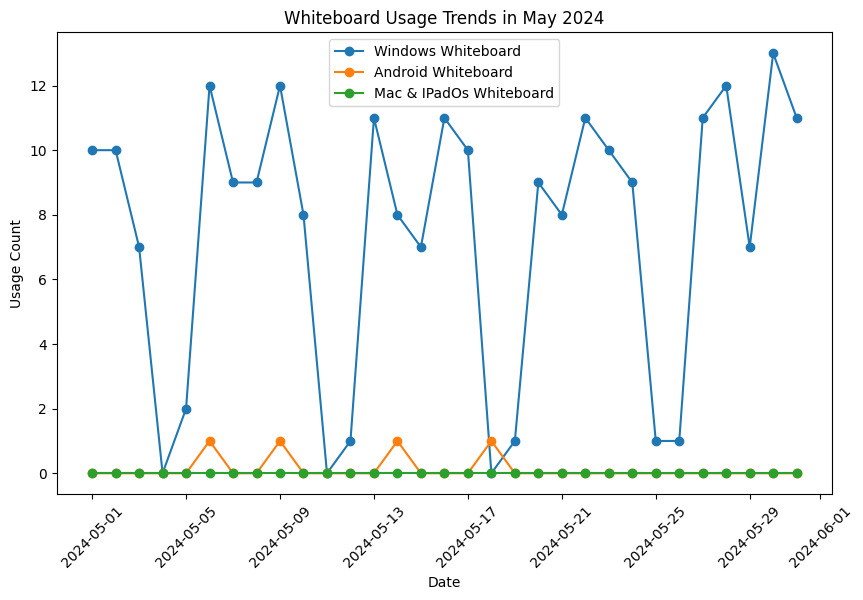

In [8]:
import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot each whiteboard's data as a line
plt.plot(df_expanded['Date'], df_expanded['Windows Whiteboard'], marker='o', label='Windows Whiteboard')
plt.plot(df_expanded['Date'], df_expanded['Android Whiteboard'], marker='o', label='Android Whiteboard')
plt.plot(df_expanded['Date'], df_expanded['Mac & IPadOs Whiteboard'], marker='o', label='Mac & IPadOs Whiteboard')

# Add titles and labels
plt.title("Whiteboard Usage Trends in May 2024")
plt.xlabel("Date")
plt.ylabel("Usage Count")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [9]:
# Create a new column in the DataFrame that corresponds to the day of the week for each date
df_expanded['Day of Week'] = df_expanded['Date'].dt.day_name()
df_expanded

,Date,Windows Whiteboard,Android Whiteboard,Mac & IPadOs Whiteboard,Day of Week
0,2024-05-01,10,0,0,Wednesday
1,2024-05-02,10,0,0,Thursday
2,2024-05-03,7,0,0,Friday
3,2024-05-04,0,0,0,Saturday
4,2024-05-05,2,0,0,Sunday
5,2024-05-06,12,1,0,Monday
6,2024-05-07,9,0,0,Tuesday
7,2024-05-08,9,0,0,Wednesday
8,2024-05-09,12,1,0,Thursday
9,2024-05-10,8,0,0,Friday


In [10]:
import plotly.express as px

# Melt the data to make it suitable for the violin plot
df_melted = df_expanded.melt(id_vars=["Day of Week"], value_vars=["Windows Whiteboard", "Android Whiteboard", "Mac & IPadOs Whiteboard"],
                    var_name="Platform", value_name="Usage")

df_melted

,Day of Week,Platform,Usage
0,Wednesday,Windows Whiteboard,10
1,Thursday,Windows Whiteboard,10
2,Friday,Windows Whiteboard,7
3,Saturday,Windows Whiteboard,0
4,Sunday,Windows Whiteboard,2
...,...,...,...
88,Monday,Mac & IPadOs Whiteboard,0
89,Tuesday,Mac & IPadOs Whiteboard,0
90,Wednesday,Mac & IPadOs Whiteboard,0
91,Thursday,Mac & IPadOs Whiteboard,0


In [11]:
# Create a violin plot using Plotly
fig = px.box(df_melted, x="Day of Week", y="Usage", color="Platform", points="all")

# Update the layout for better readability
fig.update_layout(
    title="Whiteboard Usage Distribution by Day of the Week",
    xaxis_title="Day of the Week",
    yaxis_title="Usage Count"
)

# Show the plot
fig.show()

In [12]:
filtered_df = df_expanded[(df_expanded['Day of Week'] == 'Sunday') | (df_expanded['Day of Week'] == 'Saturday')]
filtered_df


,Date,Windows Whiteboard,Android Whiteboard,Mac & IPadOs Whiteboard,Day of Week
3,2024-05-04,0,0,0,Saturday
4,2024-05-05,2,0,0,Sunday
10,2024-05-11,0,0,0,Saturday
11,2024-05-12,1,0,0,Sunday
17,2024-05-18,0,1,0,Saturday
18,2024-05-19,1,0,0,Sunday
24,2024-05-25,1,0,0,Saturday
25,2024-05-26,1,0,0,Sunday


可以看到，使用上是以windows為主，並且一到五皆有蠻高的使用頻率，也注意到週末學校可能會固定使用一次電子白板，但用途不明。